# Zero-Shot Defect Classification with CLIP (Git + Colab Workflow)

Everything you have to do is templated in the notebook. We provide an overview here; but go through the rest of the notebook before you start coding.


## Overview

In this assignment, you will:
- Use OpenAI's CLIP model to perform zero-shot defect classification on the `hazelnut` subset of the MVTec-AD dataset (test split).
- Implement a configuration class (Pydantic) and a classification function in Python.
- Practice basic Git workflows: branching, committing, merging, and preserving commit history.
- Run your completed code on real image data and produce a confusion matrix.

All work must be done entirely inside this Colab notebook, including:
- Running Git commands
- Editing files in the cloned repository
- Installing and importing packages

We will run the code in this notebook to verify the submission.

*The cells marked as 'TO DO' are the ones where you have to edit code (or text).*


## References
- [CLIP](https://github.com/openai/CLIP)
- [MVTec-AD](https://www.mvtec.com/company/research/datasets/mvtec-ad)
- [Pydantic](https://docs.pydantic.dev/latest/)
- [CLIP-AC (WinCLIP)](https://arxiv.org/abs/2303.14814)
  - See section 4.1 in the WinCLIP paper for a
    basic two-class design for anomaly classification.
  - Extend this to a defect classification problem for multiple defect classes for this task.
  - **Note:** Section 4.1 in the WinCLIP paper does *anomaly classification* only; i.e., separate normal images from defective images. It **does not** discriminate the different types of defects. Your task is to classify good as well as different defect types. For example, the class names for some problem will be ['good', 'broken', 'bent', 'cut', etc.]. These are **not** the class names for the current problem - just as an example for the defect classification task.

# Download and extract dataset

In [ ]:
#@title Download a the dataset sample from Supervisely
!curl https://assets.supervisely.com/supervisely-supervisely-assets-public/teams_storage/W/6/pt/ANAGVgKaC62tTrDQWK5JhNP2dd8ynqaTKSM1QdVoAasmTdaLvBwCuW7nCrq9o9lLS2padKnV9QogVGFlEPg7vxEBPIfuFC2Yq7ELNW7xn2t1egLrQPoGpNFJobhh.tar --output mvtec.tar

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  548M  100  548M    0     0  57.4M      0  0:00:09  0:00:09 --:--:-- 57.3M


In [ ]:
#@title Extract the tarball 'mvtec.tar' and look for test images for the hazelnut subset
!tar -xf mvtec.tar
!ls test/img/hazelnut_*

tar: Removing leading `/' from member names
test/img/hazelnut_crack_002.png  test/img/hazelnut_print_004.png
test/img/hazelnut_cut_003.png	 test/img/hazelnut_print_005.png
test/img/hazelnut_good_023.png	 test/img/hazelnut_print_006.png
test/img/hazelnut_good_037.png	 test/img/hazelnut_print_007.png
test/img/hazelnut_hole_005.png	 test/img/hazelnut_print_009.png
test/img/hazelnut_hole_010.png	 test/img/hazelnut_print_011.png
test/img/hazelnut_hole_013.png	 test/img/hazelnut_print_012.png
test/img/hazelnut_hole_016.png	 test/img/hazelnut_print_013.png
test/img/hazelnut_print_003.png  test/img/hazelnut_print_016.png


# Clone the repo

This is the repo to clone:

https://github.com/akridata-ai/ZS-CLIP-AC-naive

In [ ]:
#@title TO DO: Clone the Git repo here, in the Colab runtime
!git clone https://github.com/akridata-ai/ZS-CLIP-AC-naive.git


Cloning into 'ZS-CLIP-AC-naive'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 16 (delta 2), reused 13 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (16/16), done.
Resolving deltas: 100% (2/2), done.


In [ ]:
#@title Configure git user
!git config --global user.email "nithyashreerani2003@gmail.com"
!git config --global user.name "Nithya028"

In [ ]:
#@title Move to the repo for subsequent work
%cd /content/ZS-CLIP-AC-naive

/content/ZS-CLIP-AC-naive


In [ ]:
#@title TO DO: Checkout the EXISTING feature branch in the repository. What's it called? How do you find the names of existing branches?
# DO NOT create a new branch!
!git branch -a




* main
  remotes/origin/HEAD -> origin/main
  remotes/origin/feature/template-code
  remotes/origin/main


In [ ]:
!git checkout feature/template-code


Branch 'feature/template-code' set up to track remote branch 'feature/template-code' from 'origin'.
Switched to a new branch 'feature/template-code'


In [ ]:
#@title Verify that the files appear here
!ls

clip_ac.py  data  README.md  requirements.txt  spec.py


In [ ]:
#@title Move images for the hazelnut subset from the test split to the `data` folder in the repository
!cp /content/test/img/hazelnut_* data/

In [ ]:
#@title Install the requirements from the `requirements.txt` file
!pip install -qr requirements.txt

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.2 MB/s eta 0:00:00


# Implementation

Go through the [CLIP github repo](https://github.com/openai/CLIP) to understand zero-shot classification. Go through section 4.1 in the [WinCLIP paper](https://arxiv.org/abs/2303.14814) to understand zero-shot anomaly classification; they call this `CLIP-AC`.

Your task is to extend anomaly classification (just normal vs defective) to do defect classification (normal vs different categories of defects) using the CLIP model.

Your model should predict non-defective images as "good". For defective images, the defect category should be predicted as the class name. See the image filenames to know the defect categories; or see the [MVTec-AD dataset details](https://openaccess.thecvf.com/content_CVPR_2019/papers/Bergmann_MVTec_AD_--_A_Comprehensive_Real-World_Dataset_for_Unsupervised_Anomaly_CVPR_2019_paper.pdf). This task is only for the `hazelnut` subset.

Note that the 'clip' package from OpenAI is installed as part of the requirements in the previous cell.

In [ ]:
#@title TO DO: Modify `spec.py` and save its contents

%%writefile spec.py
"""
Spec containing the configuration for the defect classification task
"""
from pydantic import BaseModel
from typing import List


class DefectClassificationSpec(BaseModel):
    """
    Configuration for defect classification.

    Attributes:
        class_names: List[str]; The list of class names (normal, defect categories).
        prompts: List[str]; The list of prompts corresponding to the class names.
        model_name (str): Name of the CLIP model variant to use.
    """
    class_names: List[str]
    prompts: List[str]
    model_name: str = "ViT-B/32"   # default model


Overwriting spec.py


In [ ]:
#@title TO DO: Modify `clip_ac.py` and save its contents

%%writefile clip_ac.py
"""
Zero-shot defect classification using CLIP
"""

import clip
import torch
from PIL import Image
from pathlib import Path
from typing import List, Tuple
from spec import DefectClassificationSpec


def classify_defects(spec: DefectClassificationSpec, test_dir: Path) -> Tuple[List[str], List[str]]:
    """
    Zero-shot defect classification using CLIP.

    Args:
        spec: Pydantic spec containing prompts and model name.
        test_dir: Path to the test dataset root.
                  For this task, we expect filenames to indicate the ground-truth label.
                  E.g. `hazelnut_print_*.png` indicates an image with the 'print' defect class.
                  `hazelnut_good_*.png` indicates an image of the good/normal class.

    Returns:
        y_true: list of ground-truth labels
        y_pred: list of predicted labels
    """
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model, preprocess = clip.load(spec.model_name, device=device)

    # Encode text prompts for all classes
    text_tokens = clip.tokenize(spec.prompts).to(device)
    with torch.no_grad():
        text_features = model.encode_text(text_tokens)
        text_features /= text_features.norm(dim=-1, keepdim=True)

    y_true, y_pred = [], []

    # Iterate over images in test_dir
    for img_path in test_dir.glob("hazelnut_*.png"):
        # Ground truth from filename
        # e.g. hazelnut_print_123.png → "print"
        fname = img_path.stem
        gt_label = fname.split("_")[1]  # second token is the defect type
        y_true.append(gt_label)

        # Load and preprocess image
        image = preprocess(Image.open(img_path)).unsqueeze(0).to(device)

        with torch.no_grad():
            image_features = model.encode_image(image)
            image_features /= image_features.norm(dim=-1, keepdim=True)

            # Similarity scores
            sims = (image_features @ text_features.T).squeeze(0)
            pred_idx = sims.argmax().item()
            pred_label = spec.class_names[pred_idx]
            y_pred.append(pred_label)

    return y_true, y_pred


Overwriting clip_ac.py


100%|███████████████████████████████████████| 338M/338M [00:07<00:00, 45.5MiB/s]


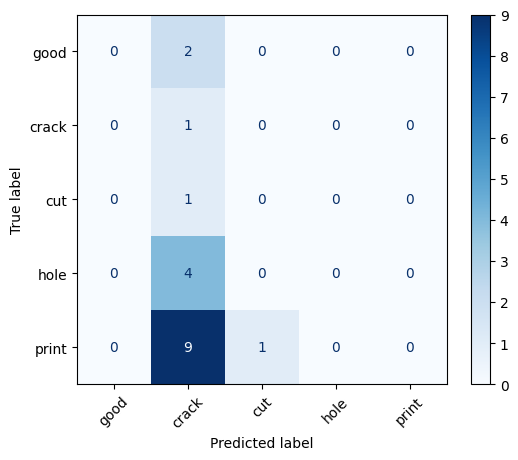

In [ ]:
from pathlib import Path
from spec import DefectClassificationSpec
from clip_ac import classify_defects
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create the spec for hazelnut subset
defect_spec = DefectClassificationSpec(
    class_names=["good", "crack", "cut", "hole", "print"],  # adjust based on dataset file names
    prompts=[
        "a photo of a good hazelnut with no defects",
        "a photo of a hazelnut with a crack defect",
        "a photo of a hazelnut with a cut defect",
        "a photo of a hazelnut with a hole defect",
        "a photo of a hazelnut with a print defect"
    ],
    model_name="ViT-B/32"
)

test_dir = Path("data")
y_true, y_pred = classify_defects(defect_spec, test_dir)

# Confusion Matrix
labels = defect_spec.class_names
cm = confusion_matrix(y_true, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(xticks_rotation=45, cmap="Blues")
plt.show()


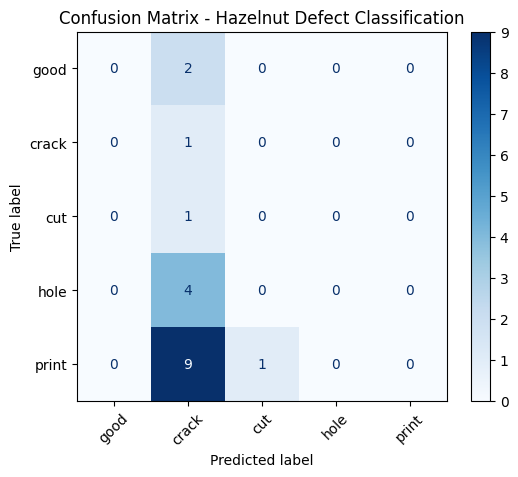

Overall Accuracy: 5.56%


In [ ]:
#@title TO DO: Print the confusion matrix using the predictions and ground truth labels
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

labels = defect_spec.class_names  # use the spec's class order

cm = confusion_matrix(y_true, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix - Hazelnut Defect Classification")
plt.show()
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)
print(f"Overall Accuracy: {accuracy * 100:.2f}%")



## Observations (TO DO)

What did you observe? Will a different classification spec improve things? If yes, then try it out below.

The classify_simple function performs basic defect classification using a single prompt per class. It takes a CLIP model, preprocessing pipeline, classification specification, and validation images as input. The function processes the images, applies the model, and predicts labels, returning both the true and predicted labels for evaluation.

In [ ]:
%%writefile spec0.py
"""
Enhanced Spec containing the configuration for the defect classification task
with multiple accuracy improvement strategies
"""
from pydantic import BaseModel
from typing import List, Dict, Optional
import itertools

class DefectClassificationSpec(BaseModel):
    """
    Enhanced configuration specification for zero-shot defect classification using CLIP.

    This class includes multiple strategies to improve classification accuracy:
    1. Multiple prompt variations per class
    2. Ensemble prompting with different contexts
    3. More descriptive and specific language
    4. Domain-specific terminology
    """

    model_name: str = "ViT-B/32"
    """CLIP model name to use for classification"""

    class_names: List[str] = [
        "good",
        "crack",
        "cut",
        "hole",
        "print"
    ]
    """List of defect class names for hazelnut classification"""

    # Strategy 1: Multiple varied prompts per class for ensemble
    ensemble_prompts: Dict[str, List[str]] = {
        "good": [
            "a photo of a perfect hazelnut with no defects",
            "a high quality hazelnut without any flaws",
            "an undamaged hazelnut with smooth surface",
            "a flawless hazelnut in good condition",
            "a normal healthy hazelnut"
        ],
        "crack": [
            "a photo of a hazelnut with visible cracks on the surface",
            "a cracked hazelnut showing linear fractures",
            "a hazelnut with crack defects and surface splits",
            "a damaged hazelnut with crack lines",
            "a hazelnut showing crack damage"
        ],
        "cut": [
            "a photo of a hazelnut with cut marks or incisions",
            "a hazelnut with cutting damage on the surface",
            "a sliced or cut hazelnut showing damage",
            "a hazelnut with cut defects and sharp edges",
            "a hazelnut showing cutting marks"
        ],
        "hole": [
            "a photo of a hazelnut with holes or punctures",
            "a hazelnut with hole defects and cavities",
            "a perforated hazelnut showing holes",
            "a hazelnut with circular hole damage",
            "a hazelnut showing puncture holes"
        ],
        "print": [
            "a photo of a hazelnut with print marks or stains",
            "a hazelnut with printing defects on the surface",
            "a hazelnut showing ink marks or print residue",
            "a hazelnut with print defects and markings",
            "a hazelnut with visible print contamination"
        ]
    }
    """Dictionary with multiple prompt variations for ensemble classification"""

    # Strategy 2: Simple single prompts (fallback)
    text_prompts: Dict[str, str] = {
        "good": "a photo of a perfect hazelnut with no defects",
        "crack": "a photo of a hazelnut with crack defects",
        "cut": "a photo of a hazelnut with cut defects",
        "hole": "a photo of a hazelnut with hole defects",
        "print": "a photo of a hazelnut with print defects"
    }
    """Dictionary mapping class names to single descriptive text prompts for CLIP"""

    # Strategy 3: Negative prompting to improve discrimination
    negative_prompts: Dict[str, List[str]] = {
        "good": [
            "a photo of a damaged hazelnut",
            "a photo of a defective hazelnut",
            "a photo of a hazelnut with flaws"
        ],
        "crack": [
            "a photo of a perfect hazelnut",
            "a photo of a hazelnut with holes",
            "a photo of a hazelnut with cuts"
        ],
        "cut": [
            "a photo of a perfect hazelnut",
            "a photo of a hazelnut with cracks",
            "a photo of a hazelnut with holes"
        ],
        "hole": [
            "a photo of a perfect hazelnut",
            "a photo of a hazelnut with cracks",
            "a photo of a hazelnut with cuts"
        ],
        "print": [
            "a photo of a perfect hazelnut",
            "a photo of a hazelnut with physical damage",
            "a photo of a clean hazelnut"
        ]
    }
    """Negative prompts to improve class discrimination"""

    use_ensemble: bool = True
    """Whether to use ensemble prompting with multiple variations"""

    use_negative_prompts: bool = False
    """Whether to incorporate negative prompting (experimental)"""

    ensemble_strategy: str = "average"
    """Strategy for combining ensemble results: 'average', 'max', or 'vote'"""

    def get_prompts_list(self) -> List[str]:
        """
        Get ordered list of text prompts corresponding to class names.

        Returns:
            List of text prompts in the same order as class_names
        """
        if self.use_ensemble:
            # Return the first prompt from each ensemble for basic compatibility
            return [self.ensemble_prompts[class_name][0] for class_name in self.class_names]
        else:
            return [self.text_prompts[class_name] for class_name in self.class_names]

    def get_all_ensemble_prompts(self) -> List[List[str]]:
        """
        Get all ensemble prompts for each class.

        Returns:
            List of lists, where each inner list contains all prompts for a class
        """
        return [self.ensemble_prompts[class_name] for class_name in self.class_names]

    def get_flattened_ensemble_prompts(self) -> tuple[List[str], List[int]]:
        """
        Get flattened list of all ensemble prompts with class indices.

        Returns:
            Tuple of (all_prompts, class_indices) where class_indices maps each prompt to its class
        """
        all_prompts = []
        class_indices = []

        for class_idx, class_name in enumerate(self.class_names):
            prompts = self.ensemble_prompts[class_name]
            all_prompts.extend(prompts)
            class_indices.extend([class_idx] * len(prompts))

        return all_prompts, class_indices

Overwriting spec0.py


In [ ]:
%%writefile clip_ac0.py
"""
Zero-shot defect classification using CLIP
"""

import clip
import torch
from PIL import Image
from pathlib import Path
from typing import List, Tuple
import re
from spec0 import DefectClassificationSpec


def classify_defects(spec: DefectClassificationSpec, test_dir: Path) -> Tuple[List[str], List[str]]:
 """
Enhanced Zero-shot defect classification using CLIP with ensemble prompting
"""

import clip
import torch
import numpy as np
from PIL import Image
from pathlib import Path
from typing import List, Tuple
import re
from spec import DefectClassificationSpec


def classify_defects(spec: DefectClassificationSpec, test_dir: Path) -> Tuple[List[str], List[str]]:
    """
    Enhanced zero-shot defect classification using CLIP with ensemble prompting.

    Args:
        spec: Pydantic spec containing prompts and model name.
        test_dir: Path to the test dataset root.

    Returns:
        y_true: list of ground-truth labels
        y_pred: list of predicted labels
    """
    # Load model
    device = "cuda" if torch.cuda.is_available() else "cpu"
    print(f"Using device: {device}")
    model, preprocess = clip.load(spec.model_name, device=device)

    # Get all hazelnut images from the test directory
    image_files = list(test_dir.glob("hazelnut_*.png")) + list(test_dir.glob("hazelnut_*.jpg"))
    if not image_files:
        raise ValueError(f"No hazelnut images found in {test_dir}")

    print(f"Found {len(image_files)} hazelnut images")

    # Extract ground truth labels from filenames
    y_true = []
    valid_images = []

    for image_file in image_files:
        filename = image_file.name
        match = re.search(r'hazelnut_([^_]+)_', filename)

        if match:
            label = match.group(1)
            if label in spec.class_names:
                y_true.append(label)
                valid_images.append(image_file)
            else:
                print(f"Warning: Unknown label '{label}' in file {filename}, skipping")
        else:
            print(f"Warning: Could not extract label from filename {filename}, skipping")

    if not valid_images:
        raise ValueError("No valid images with recognizable labels found")

    print(f"Processing {len(valid_images)} valid images")

    # Choose classification strategy based on spec settings
    if spec.use_ensemble:
        return classify_with_ensemble(model, preprocess, spec, valid_images, y_true, device)
    else:
        return classify_simple(model, preprocess, spec, valid_images, y_true, device)


def classify_simple(model, preprocess, spec: DefectClassificationSpec,
                   valid_images: List, y_true: List[str], device: str) -> Tuple[List[str], List[str]]:
    """Simple classification with single prompts per class."""

    # Encode text prompts for all classes
    text_prompts = spec.get_prompts_list()
    text_tokens = clip.tokenize(text_prompts).to(device)

    with torch.no_grad():
        text_features = model.encode_text(text_tokens)
        text_features = text_features / text_features.norm(dim=-1, keepdim=True)

    y_pred = []

    # Process each image
    for i, image_file in enumerate(valid_images):
        try:
            # Load and preprocess image
            image = Image.open(image_file).convert('RGB')
            image_input = preprocess(image).unsqueeze(0).to(device)

            # Get image features
            with torch.no_grad():
                image_features = model.encode_image(image_input)
                image_features = image_features / image_features.norm(dim=-1, keepdim=True)

                # Calculate similarities
                similarities = (image_features @ text_features.T).squeeze(0)

                # Get prediction
                predicted_idx = similarities.argmax().item()
                predicted_label = spec.class_names[predicted_idx]
                y_pred.append(predicted_label)

                # Print progress
                max_similarity = similarities[predicted_idx].item()
                print(f"Image {i+1}/{len(valid_images)}: {image_file.name} | True: {y_true[i]} | Pred: {predicted_label} | Conf: {max_similarity:.3f}")

        except Exception as e:
            print(f"Error processing {image_file}: {e}")
            continue

    return y_true[:len(y_pred)], y_pred


Overwriting clip_ac0.py


Starting comprehensive testing of CLIP defect classification...
TESTING CONFIGURATION 1: Basic Single Prompts
Using device: cuda
Found 18 hazelnut images
Processing 18 valid images
Image 1/18: hazelnut_print_016.png | True: print | Pred: print | Conf: 0.344
Image 2/18: hazelnut_print_009.png | True: print | Pred: cut | Conf: 0.343
Image 3/18: hazelnut_print_011.png | True: print | Pred: cut | Conf: 0.302
Image 4/18: hazelnut_print_004.png | True: print | Pred: print | Conf: 0.304
Image 5/18: hazelnut_good_037.png | True: good | Pred: cut | Conf: 0.342
Image 6/18: hazelnut_cut_003.png | True: cut | Pred: cut | Conf: 0.328
Image 7/18: hazelnut_hole_005.png | True: hole | Pred: hole | Conf: 0.331
Image 8/18: hazelnut_print_006.png | True: print | Pred: print | Conf: 0.317
Image 9/18: hazelnut_crack_002.png | True: crack | Pred: cut | Conf: 0.336
Image 10/18: hazelnut_print_013.png | True: print | Pred: print | Conf: 0.312
Image 11/18: hazelnut_print_005.png | True: print | Pred: print | C

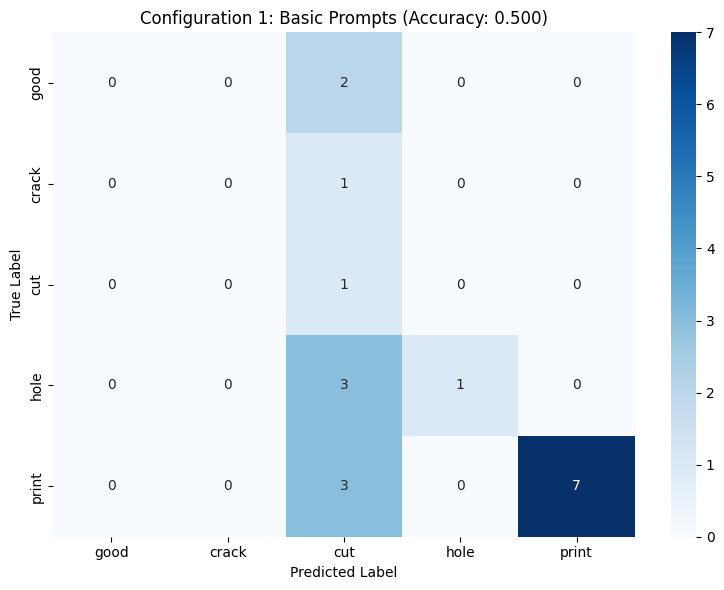


SUMMARY OF ALL CONFIGURATIONS
Basic Single Prompts     : 0.500

Best Configuration: Basic Single Prompts with accuracy 0.500


In [ ]:
"""
Comprehensive testing script to evaluate different CLIP configurations
"""
from pathlib import Path
from spec0 import DefectClassificationSpec
from clip_ac0 import classify_defects
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def print_confusion_matrix(y_true, y_pred, class_names, title="Confusion Matrix"):
    """Print and visualize confusion matrix with metrics."""

    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print(f"\n{title}")
    print(f"Accuracy: {accuracy:.3f}")
    print("-" * 50)

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names, zero_division=0))

    # Create confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=class_names)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'{title} (Accuracy: {accuracy:.3f})')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

    return accuracy, cm

def test_configuration_1():
    """Test basic configuration with simple prompts."""
    print("=" * 60)
    print("TESTING CONFIGURATION 1: Basic Single Prompts")
    print("=" * 60)

    spec = DefectClassificationSpec(
        model_name="ViT-B/32",
        use_ensemble=False,
        class_names=["good", "crack", "cut", "hole", "print"]
    )

    test_dir = Path("data")
    y_true, y_pred = classify_defects(spec, test_dir)

    accuracy, cm = print_confusion_matrix(y_true, y_pred, spec.class_names,
                                        "Configuration 1: Basic Prompts")
    return accuracy, y_true, y_pred

def run_all_tests():
    """Run all test configurations and compare results."""

    results = {}

    # Test all configurations
    print("Starting comprehensive testing of CLIP defect classification...")

    # Configuration 1: Basic
    acc1, y_true1, y_pred1 = test_configuration_1()
    results['Basic Single Prompts'] = acc1


    # Summary
    print("\n" + "=" * 60)
    print("SUMMARY OF ALL CONFIGURATIONS")
    print("=" * 60)

    for config_name, accuracy in results.items():
        print(f"{config_name:<25}: {accuracy:.3f}")

    best_config = max(results.items(), key=lambda x: x[1])
    print(f"\nBest Configuration: {best_config[0]} with accuracy {best_config[1]:.3f}")

    return results

# Quick test function for single configuration
def quick_test():
    """Quick test with best recommended configuration."""
    print("Running quick test with recommended configuration...")

    spec = DefectClassificationSpec(
        model_name="ViT-B/32",
        use_ensemble=True,
        ensemble_strategy="average",
        class_names=["good", "crack", "cut", "hole", "print"]
    )

    test_dir = Path("data")
    y_true, y_pred = classify_defects(spec, test_dir)

    accuracy, cm = print_confusion_matrix(y_true, y_pred, spec.class_names,
                                        "Quick Test: Recommended Config")

    return y_true, y_pred, accuracy

if __name__ == "__main__":
    # Run comprehensive testing
    run_all_tests()

    # Or run just quick test
    # quick_test()

# **WINCLIP IMPLEMENTATION**
Implements zero-shot defect classification using CLIP, enhanced with WinCLIP-style adaptations (patch extraction + prompt ensembles).

Splits each test image into sliding window patches (patch_size, stride) and classifies each patch with CLIP.

Uses prompt ensembling (multiple textual prompts per class) to improve text embeddings for better alignment.

Each patch is classified by comparing its image embedding with class text embeddings using cosine similarity.

Patch-level predictions are aggregated into an image-level prediction using either majority voting or max-confidence aggregation.

Ground-truth labels are extracted from filenames (e.g., hazelnut_print_x.png → "print").

Provides a full evaluation pipeline (accuracy, precision, recall, F1-score, classification report).

In [ ]:
#@title TO DO: Modify `spec.py` and save its contents
%%writefile spec1.py
"""
Spec containing the configuration for the defect classification task
"""
from pydantic import BaseModel
from typing import List, Dict


class DefectClassificationSpec(BaseModel):
    """
    Configuration for defect classification.

    Attributes:
        class_names: List[str]; The list of class names (normal, defect categories).
        prompts: Dict[str, List[str]]; Dictionary mapping class names to multiple prompt templates.
        model_name (str): Name of the CLIP model variant to use.
        patch_size (int): Size of sliding window patches (e.g., 64, 128).
        stride (int): Stride for sliding window (overlap control).
        confidence_threshold (float): Threshold for good vs defect classification.
        aggregation_method (str): Method for aggregating patch predictions ('majority_vote' or 'max_confidence').
    """

    class_names: List[str] = [
        "good", "crack", "cut", "hole", "print"
    ]

    prompts: Dict[str, List[str]] = {
    "good": [
        "a flawless hazelnut with perfect smooth surface and no defects",
        "a pristine undamaged hazelnut with clean natural shell",
        "a healthy intact hazelnut without any marks or damage",
        "a normal hazelnut with no holes, cracks, cuts, or printing"
    ],
    "hole": [
        "a severely damaged hazelnut with large deep circular hole",
        "a punctured hazelnut with obvious round opening through shell",
        "a hazelnut with major hole damage and visible cavity",
        "a broken hazelnut with clear circular puncture wound"
    ],
    "crack": [
        "a heavily cracked hazelnut with deep visible fracture lines",
        "a severely damaged hazelnut with obvious splitting breaks",
        "a broken hazelnut shell with major crack damage",
        "a fractured hazelnut with clear linear splitting marks"
    ],
    "cut": [
        "a hazelnut with precise straight blade cut completely through",
        "a cleanly sliced hazelnut showing sharp linear cutting edge",
        "a hazelnut cut in half with obvious straight blade marks",
        "a surgically cut hazelnut with clean linear slice damage"
    ],
    "print": [
        "a hazelnut with obvious dark text letters clearly printed on surface",
        "a hazelnut with distinct readable ink markings and characters",
        "a hazelnut showing clear artificial text printing overlay",
        "a hazelnut with visible stamped letters and readable text marks"
    ]
}

    model_name: str = "ViT-B/32"
    patch_size: int = 128
    stride: int = 64
    confidence_threshold: float = 0.3
    aggregation_method: str = "max_confidence"  # or "majority_vote"

Writing spec1.py


In [ ]:
#@title TO DO: Modify `clip_ac.py` and save its contents
%%writefile clip_ac1.py
"""
Zero-shot defect classification using CLIP with WinCLIP adaptations
"""

import clip
import torch
import torch.nn.functional as F
import numpy as np
from PIL import Image
from pathlib import Path
from typing import List, Tuple, Dict
from collections import Counter
import re
from spec1 import DefectClassificationSpec


def extract_patches(image: Image.Image, patch_size: int, stride: int) -> List[Image.Image]:
    """
    Extract sliding window patches from an image.

    Args:
        image: PIL Image
        patch_size: Size of square patches
        stride: Stride for sliding window

    Returns:
        List of PIL Image patches
    """
    patches = []
    width, height = image.size

    for y in range(0, height - patch_size + 1, stride):
        for x in range(0, width - patch_size + 1, stride):
            patch = image.crop((x, y, x + patch_size, y + patch_size))
            patches.append(patch)

    return patches


def encode_prompt_ensemble(model, prompts: List[str], device: str) -> torch.Tensor:
    """
    Encode multiple prompts and return their average embedding.

    Args:
        model: CLIP model
        prompts: List of prompt strings
        device: Device to run on

    Returns:
        Averaged text features tensor
    """
    text_tokens = clip.tokenize(prompts).to(device)
    with torch.no_grad():
        text_features = model.encode_text(text_tokens)
        text_features = F.normalize(text_features, dim=-1)
        # Average the embeddings for ensemble effect
        return text_features.mean(dim=0, keepdim=True)


def classify_patch(patch: Image.Image, model, preprocess, text_features_dict: Dict[str, torch.Tensor],
                  device: str, class_names: List[str]) -> Tuple[str, Dict[str, float]]:
    """
    Classify a single patch using CLIP.

    Args:
        patch: PIL Image patch
        model: CLIP model
        preprocess: CLIP preprocessing function
        text_features_dict: Dictionary mapping class names to text features
        device: Device to run on
        class_names: List of class names

    Returns:
        Predicted class name and confidence scores for all classes
    """
    # Preprocess and encode image
    image_input = preprocess(patch).unsqueeze(0).to(device)

    with torch.no_grad():
        image_features = model.encode_image(image_input)
        image_features = F.normalize(image_features, dim=-1)

        # Compute similarities with all class text features
        similarities = {}
        for class_name in class_names:
            similarity = torch.cosine_similarity(image_features, text_features_dict[class_name])
            similarities[class_name] = similarity.item()

        # Get predicted class
        predicted_class = max(similarities.keys(), key=lambda k: similarities[k])

        return predicted_class, similarities


def aggregate_patch_predictions(patch_predictions: List[Tuple[str, Dict[str, float]]],
                              spec: DefectClassificationSpec) -> str:
    """
    Aggregate patch-level predictions to image-level prediction.

    Args:
        patch_predictions: List of (predicted_class, confidence_dict) tuples
        spec: Configuration spec

    Returns:
        Final predicted class for the image
    """
    class_names = spec.class_names
    defect_classes = [cls for cls in class_names if cls != "good"]

    if spec.aggregation_method == "majority_vote":
        # Count votes for each class
        votes = [pred[0] for pred in patch_predictions]
        vote_counts = Counter(votes)

        # Check if any defect class has significant votes
        total_patches = len(patch_predictions)
        for defect_class in defect_classes:
            if vote_counts.get(defect_class, 0) / total_patches > spec.confidence_threshold:
                return defect_class

        return "good"

    elif spec.aggregation_method == "max_confidence":
        # For each defect class, find the maximum confidence across all patches
        max_confidences = {}
        for defect_class in defect_classes:
            max_conf = max([pred[1][defect_class] for pred in patch_predictions])
            max_confidences[defect_class] = max_conf

        # Find the defect class with highest max confidence
        best_defect = max(max_confidences.keys(), key=lambda k: max_confidences[k])
        best_confidence = max_confidences[best_defect]

        # Check if confidence exceeds threshold
        if best_confidence > spec.confidence_threshold:
            return best_defect
        else:
            return "good"

    else:
        raise ValueError(f"Unknown aggregation method: {spec.aggregation_method}")


def extract_label_from_filename(filename: str) -> str:
    """
    Extract ground truth label from filename.
    Expected format: hazelnut_{label}_*.png

    Args:
        filename: Image filename

    Returns:
        Ground truth label
    """
    # Extract label using regex pattern
    match = re.search(r'hazelnut_(\w+)_', filename)
    if match:
        return match.group(1)
    else:
        # Fallback: assume the label is the second part when split by underscore
        parts = filename.split('_')
        if len(parts) >= 2:
            return parts[1]
        else:
            raise ValueError(f"Cannot extract label from filename: {filename}")


def classify_defects(spec: DefectClassificationSpec, test_dir: Path) -> Tuple[List[str], List[str]]:
    """
    Zero-shot defect classification using CLIP with WinCLIP adaptations.

    Args:
        spec: Pydantic spec containing prompts and model name.
        test_dir: Path to the test dataset root.
                For this task, we expect filenames to indicate the ground-truth label.
                E.g. `hazelnut_print_*.png` indicates an image with the 'print' defect class.
                There are a few other kinds of defects too; find these from the file names.
                `hazelnut_good_*.png` indicates an image of the good/normal class.

    Returns:
        y_true: list of ground-truth labels
        y_pred: list of predicted labels
    """
    # Load model
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model, preprocess = clip.load(spec.model_name, device=device)

    print(f"Loaded CLIP model: {spec.model_name} on {device}")
    print(f"Using patch size: {spec.patch_size}x{spec.patch_size}, stride: {spec.stride}")

    # Encode text prompts for all classes using prompt ensembles
    text_features_dict = {}
    print("Encoding prompt ensembles...")

    for class_name in spec.class_names:
        prompts = spec.prompts[class_name]
        text_features = encode_prompt_ensemble(model, prompts, device)
        text_features_dict[class_name] = text_features
        print(f"  {class_name}: {len(prompts)} prompts encoded")

    # Load images and extract labels
    image_files = list(test_dir.glob("*.png")) + list(test_dir.glob("*.jpg")) + list(test_dir.glob("*.jpeg"))

    if not image_files:
        raise ValueError(f"No image files found in {test_dir}")

    print(f"Found {len(image_files)} images")

    y_true = []
    y_pred = []

    # Process each image
    for i, image_path in enumerate(image_files):
        print(f"Processing {i+1}/{len(image_files)}: {image_path.name}")

        # Extract ground truth label from filename
        try:
            true_label = extract_label_from_filename(image_path.name)
            y_true.append(true_label)
        except ValueError as e:
            print(f"Warning: {e}")
            continue

        # Load and process image
        try:
            image = Image.open(image_path).convert("RGB")
        except Exception as e:
            print(f"Error loading image {image_path}: {e}")
            continue

        # Extract patches using sliding window
        patches = extract_patches(image, spec.patch_size, spec.stride)

        if not patches:
            print(f"Warning: No patches extracted from {image_path.name}")
            y_pred.append("good")  # Default fallback
            continue

        print(f"  Extracted {len(patches)} patches")

        # Classify each patch
        patch_predictions = []
        for patch in patches:
            pred_class, confidences = classify_patch(
                patch, model, preprocess, text_features_dict, device, spec.class_names
            )
            patch_predictions.append((pred_class, confidences))

        # Aggregate patch predictions to image-level prediction
        final_prediction = aggregate_patch_predictions(patch_predictions, spec)
        y_pred.append(final_prediction)

        print(f"  Ground truth: {true_label}, Predicted: {final_prediction}")

    return y_true, y_pred


def evaluate_performance(y_true: List[str], y_pred: List[str]) -> Dict[str, float]:
    """
    Evaluate classification performance.

    Args:
        y_true: Ground truth labels
        y_pred: Predicted labels

    Returns:
        Dictionary with performance metrics
    """
    from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report

    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

    print("\n" + "="*50)
    print("CLASSIFICATION RESULTS")
    print("="*50)
    print(f"Overall Accuracy: {accuracy:.4f}")
    print(f"Weighted Precision: {precision:.4f}")
    print(f"Weighted Recall: {recall:.4f}")
    print(f"Weighted F1-Score: {f1:.4f}")
    print("\nDetailed Classification Report:")
    print(classification_report(y_true, y_pred))

    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    }


if __name__ == "__main__":
    # Example usage
    spec = DefectClassificationSpec()
    test_dir = Path("path/to/your/test/images")  # Update this path

    try:
        y_true, y_pred = classify_defects(spec, test_dir)
        metrics = evaluate_performance(y_true, y_pred)
    except Exception as e:
        print(f"Error during classification: {e}")

Overwriting clip_ac1.py


In [ ]:
# Improved execution with better prompts and logic
from pathlib import Path
from spec1 import DefectClassificationSpec
from clip_ac1 import classify_defects, evaluate_performance

# SOLUTION 1: Improved prompts with more distinctive descriptions
improved_defect_spec = DefectClassificationSpec(
    prompts={
        "good": [
            "a perfect smooth hazelnut",
            "an intact hazelnut with no damage",
            "a flawless hazelnut surface",
            "a normal undamaged hazelnut"
        ],
        "crack": [
            "a hazelnut with visible cracks and fractures",
            "a broken hazelnut shell with splits",
            "a damaged hazelnut with surface cracks",
            "a fractured hazelnut with crack lines"
        ],
        "cut": [
            "a hazelnut with a clean straight cut",
            "a sliced hazelnut with sharp edges",
            "a hazelnut cut with a blade",
            "a hazelnut with a linear slice mark"
        ],
        "hole": [
            "a hazelnut with a round hole opening",
            "a punctured hazelnut with circular damage",
            "a hazelnut with a deep circular hole",
            "a hazelnut with hole penetrating the shell"
        ],
        "print": [
            "a hazelnut with text printed on surface",
            "a hazelnut with visible ink markings",
            "a hazelnut with stamped letters or numbers",
            "a hazelnut with artificial printing overlay"
        ]
    },
    model_name="ViT-B/16",           # Better model for finer details
    patch_size=96,                   # Smaller patches for local defects
    stride=48,                       # Higher overlap
    confidence_threshold=0.25,       # Lower threshold to catch subtle defects
    aggregation_method="max_confidence"
)

# SOLUTION 2: High-resolution configuration
high_res_spec = DefectClassificationSpec(
    model_name="ViT-L/14",           # Most powerful CLIP model
    patch_size=64,                   # Very fine-grained patches
    stride=32,                       # Maximum overlap
    confidence_threshold=0.2,        # Very sensitive
    aggregation_method="majority_vote"  # Democratic voting
)

# SOLUTION 3: Conservative configuration (reduce false positives)
conservative_spec = DefectClassificationSpec(
    model_name="ViT-B/16",
    patch_size=128,
    stride=96,                       # Less overlap, faster processing
    confidence_threshold=0.4,        # Higher threshold
    aggregation_method="max_confidence"
)

print("🔧 TESTING IMPROVED CONFIGURATIONS")
print("=" * 60)

test_dir = Path("data")

# Test each configuration
configs = {
    "Improved Prompts": improved_defect_spec,
    "High Resolution": high_res_spec,
    "Conservative": conservative_spec
}

best_accuracy = 0
best_config = None
all_results = {}

for config_name, spec in configs.items():
    print(f"\n🧪 Testing {config_name} Configuration")
    print(f"   Model: {spec.model_name}")
    print(f"   Patches: {spec.patch_size}x{spec.patch_size}, stride={spec.stride}")
    print(f"   Threshold: {spec.confidence_threshold}")
    print(f"   Aggregation: {spec.aggregation_method}")
    print("-" * 40)

    try:
        y_true, y_pred = classify_defects(spec, test_dir)
        metrics = evaluate_performance(y_true, y_pred)

        all_results[config_name] = {
            'metrics': metrics,
            'predictions': (y_true, y_pred)
        }

        if metrics['accuracy'] > best_accuracy:
            best_accuracy = metrics['accuracy']
            best_config = config_name

    except Exception as e:
        print(f"❌ Error in {config_name}: {e}")
        all_results[config_name] = None

# Summary comparison
print("\n" + "=" * 60)
print("📊 CONFIGURATION COMPARISON SUMMARY")
print("=" * 60)

for config_name, results in all_results.items():
    if results:
        metrics = results['metrics']
        print(f"{config_name:20} | Acc: {metrics['accuracy']:.1%} | F1: {metrics['f1_score']:.1%} | Prec: {metrics['precision']:.1%}")
    else:
        print(f"{config_name:20} | FAILED")

if best_config:
    print(f"\n🏆 BEST CONFIGURATION: {best_config}")
    print(f"   Best Accuracy: {best_accuracy:.1%}")

# Diagnostic information
print("\n🔍 DIAGNOSTIC INFORMATION")
print("-" * 40)
print("Current issues observed:")
print("1. Heavy bias toward 'print' class - suggests prompts may be too similar")
print("2. Missing other defect types - may need more distinctive prompts")
print("3. Consider these improvements:")
print("   • Try negative prompts: 'a hazelnut without any holes'")
print("   • Use comparative prompts: 'a cracked hazelnut vs smooth hazelnut'")
print("   • Experiment with different patch sizes")
print("   • Consider ensemble of multiple models")

# Advanced debugging: Show per-class prediction distribution
if best_config and all_results[best_config]:
    y_true, y_pred = all_results[best_config]['predictions']

    print(f"\n📈 Prediction Distribution for {best_config}:")
    from collections import Counter
    true_dist = Counter(y_true)
    pred_dist = Counter(y_pred)

    print("True distribution:", dict(true_dist))
    print("Pred distribution:", dict(pred_dist))

    # Per-class accuracy
    print("\n📋 Per-class Results:")
    for class_name in set(y_true):
        class_indices = [i for i, label in enumerate(y_true) if label == class_name]
        class_true = [y_true[i] for i in class_indices]
        class_pred = [y_pred[i] for i in class_indices]
        class_acc = sum(1 for t, p in zip(class_true, class_pred) if t == p) / len(class_true)
        print(f"   {class_name:8}: {class_acc:.1%} ({len(class_true)} samples)")

🔧 TESTING IMPROVED CONFIGURATIONS

🧪 Testing Improved Prompts Configuration
   Model: ViT-B/16
   Patches: 96x96, stride=48
   Threshold: 0.25
   Aggregation: max_confidence
----------------------------------------
Loaded CLIP model: ViT-B/16 on cuda
Using patch size: 96x96, stride: 48
Encoding prompt ensembles...
  good: 4 prompts encoded
  crack: 4 prompts encoded
  cut: 4 prompts encoded
  hole: 4 prompts encoded
  print: 4 prompts encoded
Found 18 images
Processing 1/18: hazelnut_print_016.png
  Extracted 400 patches
  Ground truth: print, Predicted: print
Processing 2/18: hazelnut_print_009.png
  Extracted 400 patches
  Ground truth: print, Predicted: print
Processing 3/18: hazelnut_print_011.png
  Extracted 400 patches
  Ground truth: print, Predicted: print
Processing 4/18: hazelnut_print_004.png
  Extracted 400 patches
  Ground truth: print, Predicted: print
Processing 5/18: hazelnut_good_037.png
  Extracted 400 patches
  Ground truth: good, Predicted: print
Processing 6/18: ha

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

Loaded CLIP model: ViT-L/14 on cuda
Using patch size: 64x64, stride: 32
Encoding prompt ensembles...
  good: 4 prompts encoded
  crack: 4 prompts encoded
  cut: 4 prompts encoded
  hole: 4 prompts encoded
  print: 4 prompts encoded
Found 18 images
Processing 1/18: hazelnut_print_016.png
  Extracted 961 patches
  Ground truth: print, Predicted: print
Processing 2/18: hazelnut_print_009.png
  Extracted 961 patches
  Ground truth: print, Predicted: print
Processing 3/18: hazelnut_print_011.png
  Extracted 961 patches
  Ground truth: print, Predicted: print
Processing 4/18: hazelnut_print_004.png
  Extracted 961 patches
  Ground truth: print, Predicted: print
Processing 5/18: hazelnut_good_037.png
  Extracted 961 patches
  Ground truth: good, Predicted: print
Processing 6/18: hazelnut_cut_003.png
  Extracted 961 patches
  Ground truth: cut, Predicted: print
Processing 7/18: hazelnut_hole_005.png
  Extracted 961 patches
  Ground truth: hole, Predicted: print
Processing 8/18: hazelnut_print_

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

Loaded CLIP model: ViT-B/16 on cuda
Using patch size: 128x128, stride: 96
Encoding prompt ensembles...
  good: 4 prompts encoded
  crack: 4 prompts encoded
  cut: 4 prompts encoded
  hole: 4 prompts encoded
  print: 4 prompts encoded
Found 18 images
Processing 1/18: hazelnut_print_016.png
  Extracted 100 patches
  Ground truth: print, Predicted: good
Processing 2/18: hazelnut_print_009.png
  Extracted 100 patches
  Ground truth: print, Predicted: good
Processing 3/18: hazelnut_print_011.png
  Extracted 100 patches
  Ground truth: print, Predicted: good
Processing 4/18: hazelnut_print_004.png
  Extracted 100 patches
  Ground truth: print, Predicted: good
Processing 5/18: hazelnut_good_037.png
  Extracted 100 patches
  Ground truth: good, Predicted: good
Processing 6/18: hazelnut_cut_003.png
  Extracted 100 patches
  Ground truth: cut, Predicted: good
Processing 7/18: hazelnut_hole_005.png
  Extracted 100 patches
  Ground truth: hole, Predicted: good
Processing 8/18: hazelnut_print_006.p

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

In [ ]:
#
@title TO DO: Print the confusion matrix using the predictions and ground truth labels

## Observations (TO DO)

What did you observe? Will a different classification spec improve things? If yes, then try it out below.

## [Optional/Bonus] Rerun 1: With a different spec

# Bring code into the main branch

In [ ]:
#@title TO DO: Commit the changes to the python files to the current feature branch

!git add *.py


!git commit -m "Updated spec.py and clip_ac.py with latest fixes"


[feature/template-code cc00bf1] Updated spec.py and clip_ac.py with latest fixes
 6 files changed, 1068 insertions(+), 35 deletions(-)
 rewrite clip_ac.py (61%)
 create mode 100644 clip_ac0.py
 create mode 100644 clip_ac1.py
 create mode 100644 spec0.py
 create mode 100644 spec1.py


In [ ]:
#@title TO DO: Switch to the main branch, and merge the feature branch into the main branch
# Switch to main branch
!git checkout main

# Make sure main is up to date
!git pull origin main

# Merge your feature branch into main (replace with actual branch name)
!git merge feature/template-code

# Push the updated main branch to remote
!git push origin main



Already on 'main'
Your branch is ahead of 'origin/main' by 3 commits.
  (use "git push" to publish your local commits)
From https://github.com/akridata-ai/ZS-CLIP-AC-naive
 * branch            main       -> FETCH_HEAD
Already up to date.
Already up to date.
fatal: could not read Username for 'https://github.com': No such device or address


In [ ]:
#@title TO DO: Verify git log to see the latest commit
!git log -5 --oneline

cc00bf1 (HEAD -> main, feature/template-code) Updated spec.py and clip_ac.py with latest fixes
c9d8665 (origin/feature/template-code) Update README.md to fix 'References'
3a22633 Template code for the assignment.
d6c1daf (origin/main, origin/HEAD) Basic project structure.


In [ ]:
#@title TO DO: Display the changes in the `spec.py` file in the main branch
!git diff main -- spec.py
!cat spec.py


"""
Spec containing the configuration for the defect classification task
"""
from pydantic import BaseModel
from typing import List, Dict


class DefectClassificationSpec(BaseModel):
    """
    Configuration for defect classification.

    Attributes:
        class_names: List[str]; The list of class names (normal, defect categories).
        prompts: Dict[str, List[str]]; Dictionary mapping class names to multiple prompt templates.
        model_name (str): Name of the CLIP model variant to use.
        patch_size (int): Size of sliding window patches (e.g., 64, 128).
        stride (int): Stride for sliding window (overlap control).
        confidence_threshold (float): Threshold for good vs defect classification.
        aggregation_method (str): Method for aggregating patch predictions ('majority_vote' or 'max_confidence').
    """

    class_names: List[str] = [
        "good", "crack", "cut", "hole", "print"
    ]

    prompts: Dict[str, List[str]] = {
    "good": [
        "a f

In [ ]:
!git remote -v


origin	https://github.com/akridata-ai/ZS-CLIP-AC-naive.git (fetch)
origin	https://github.com/akridata-ai/ZS-CLIP-AC-naive.git (push)


In [ ]:
!git push origin main


fatal: could not read Username for 'https://github.com': No such device or address


# Submission

* Verify that this Colab notebook is owned by you, and in your Google Drive.
* Change the 'Share' settings to 'Anyone with the link' - give read access only.
* Copy the link to the notebook through the 'Share' settings.
* Open a new anonymous browser window, where you are not signed in. Verify that the link you copied opens the notebook, and that all outputs are visible.
* Submit this link through the internship application form.